In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline



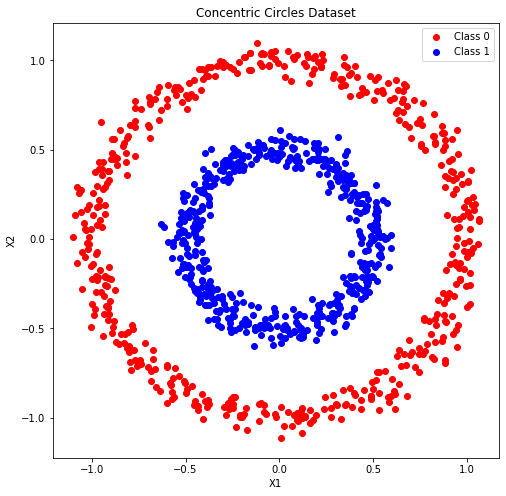

In [19]:

# Generate dataset
n_samples = 1000
noise = 0.05
X, y = make_circles(n_samples=n_samples, factor=0.5, noise=noise)

# Plot the dataset
plt.figure(figsize=(8, 8))
plt.scatter(X[y == 0, 0], X[y == 0, 1], c='red', label='Class 0')
plt.scatter(X[y == 1, 0], X[y == 1, 1], c='blue', label='Class 1')
plt.title("Concentric Circles Dataset")
plt.xlabel("X1")
plt.ylabel("X2")
plt.legend()
plt.show()


## Fitting a rbg kernel

In [5]:
svm = make_pipeline(StandardScaler(), SVC(kernel='rbf', C=1.0, gamma='scale'))
svm.fit(X, y)


Pipeline(steps=[('standardscaler', StandardScaler()), ('svc', SVC())])

In [6]:
# Create a grid to plot decision boundaries
xx, yy = np.meshgrid(np.linspace(X[:, 0].min() - 0.5, X[:, 0].max() + 0.5, 500),
                     np.linspace(X[:, 1].min() - 0.5, X[:, 1].max() + 0.5, 500))
Z = svm.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

No handles with labels found to put in legend.


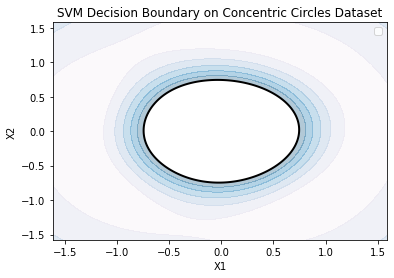

In [7]:
# Plot decision boundaries
plt.contourf(xx, yy, Z, levels=np.linspace(Z.min(), 0, 7), alpha=0.3, cmap=plt.cm.PuBu)
plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='k')

# Add labels and title
plt.title("SVM Decision Boundary on Concentric Circles Dataset")
plt.xlabel("X1")
plt.ylabel("X2")
plt.legend()
plt.show()

## Converting the dataset into polar corrdinate

In [20]:
def cartesian_to_polar(X):
    r = np.sqrt(X[:, 0]**2 + X[:, 1]**2)
    theta = np.arctan2(X[:, 1], X[:, 0])
    return np.c_[r, theta]

X_polar = cartesian_to_polar(X)


Plotting the new dataset (in cartesian space)

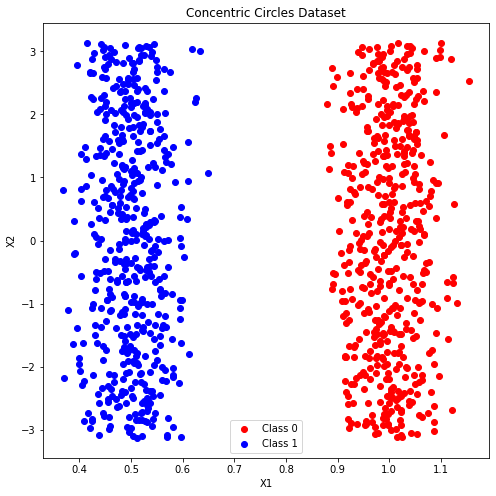

In [21]:
plt.figure(figsize=(8, 8))
plt.scatter(X_polar[y == 0, 0], X_polar[y == 0, 1], c='red', label='Class 0')
plt.scatter(X_polar[y == 1, 0], X_polar[y == 1, 1], c='blue', label='Class 1')
plt.title("Concentric Circles Dataset")
plt.xlabel("X1")
plt.ylabel("X2")
plt.legend()
plt.show()

# Fitting a Linear Kernel

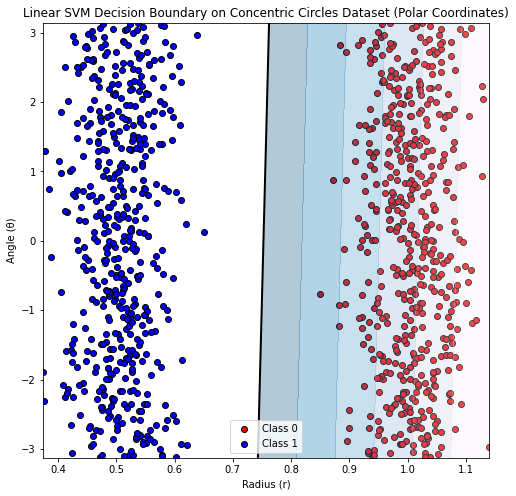

In [17]:
svm_linear = make_pipeline(StandardScaler(), SVC(kernel='linear'))

# Fit the SVM model to the polar coordinates dataset
svm_linear.fit(X_polar, y)

# Plot the dataset in polar coordinates
plt.figure(figsize=(8, 8))
plt.scatter(X_polar[y == 0, 0], X_polar[y == 0, 1], c='red', label='Class 0', edgecolors='k')
plt.scatter(X_polar[y == 1, 0], X_polar[y == 1, 1], c='blue', label='Class 1', edgecolors='k')

# Create a grid to plot decision boundaries
r = np.linspace(X_polar[:, 0].min(), X_polar[:, 0].max(), 500)
theta = np.linspace(X_polar[:, 1].min(), X_polar[:, 1].max(), 500)
rr, tt = np.meshgrid(r, theta)
Z = svm_linear.decision_function(np.c_[rr.ravel(), tt.ravel()])
Z = Z.reshape(rr.shape)

# Plot decision boundaries
plt.contourf(rr, tt, Z, levels=np.linspace(Z.min(), 0, 7), alpha=0.3, cmap=plt.cm.PuBu)
plt.contour(rr, tt, Z, levels=[0], linewidths=2, colors='k')

# Add labels and title
plt.title("Linear SVM Decision Boundary on Concentric Circles Dataset (Polar Coordinates)")
plt.xlabel("Radius (r)")
plt.ylabel("Angle (θ)")
plt.legend()
plt.show()